In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# CSV 파일에서 데이터 읽기
df = pd.read_csv('/content/니켈_수급안정화지수.csv')

# 불필요한 열 제거
df = df[['date', 'value']]

# 날짜 형식 변환
df['date'] = pd.to_datetime(df['date'], format='%Y%m')
df.set_index('date', inplace=True)

# NaN 값 제거
df = df.dropna()

# 데이터 확인
print(df)


            value
date             
2017-02-01  78.24
2017-03-01  74.56
2017-04-01  77.10
2017-05-01  80.06
2017-06-01  82.15
...           ...
2024-01-01  48.14
2024-02-01  52.14
2024-03-01  51.21
2024-04-01  44.00
2024-05-01  36.40

[88 rows x 1 columns]


In [3]:
import matplotlib.font_manager as fm

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [4]:
# 모델 학습
model = ExponentialSmoothing(df['value'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# 예측 수행 (12개월)
forecast = fit.forecast(steps=12)

# 예측 결과 출력
print(forecast)


2024-06-01    29.947563
2024-07-01    22.646178
2024-08-01    14.931321
2024-09-01     4.978689
2024-10-01    -2.198761
2024-11-01    -6.773951
2024-12-01   -11.347962
2025-01-01   -15.828174
2025-02-01   -23.846160
2025-03-01   -32.195817
2025-04-01   -36.197122
2025-05-01   -43.105032
Freq: MS, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


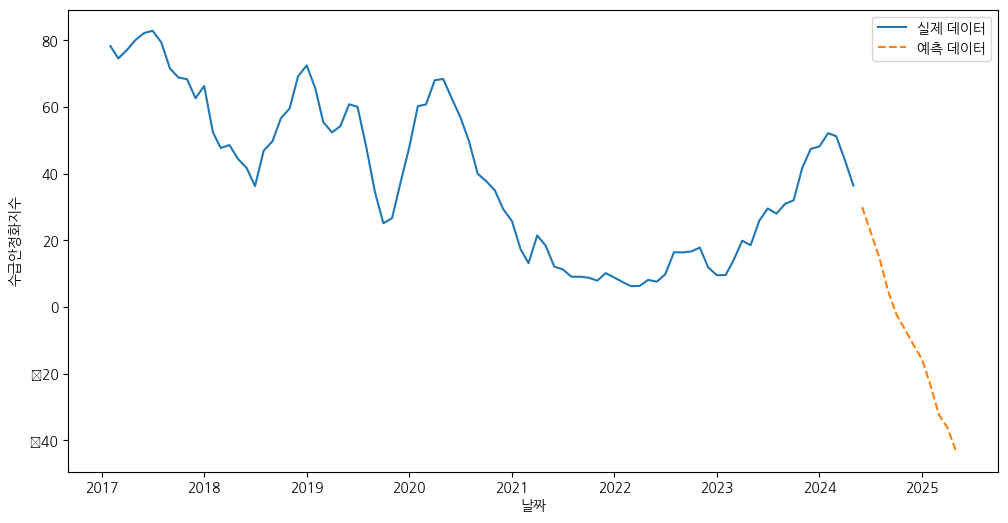

In [5]:
# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], label='실제 데이터')
plt.plot(forecast.index, forecast, label='예측 데이터', linestyle='--')
plt.xlabel('날짜')
plt.ylabel('수급안정화지수')
plt.legend()
plt.show()


위의 시계열 예측 모델은 **홀트-윈터스법(Holt-Winters method)**을 사용한 지수 평활법(Exponential Smoothing) 모델입니다. 이 모델은 시계열 데이터를 예측하는 데 사용되며, 특히 계절성과 추세를 고려하여 데이터를 분석할 때 유용합니다. 여기서는 모델의 유형, 적용 방식, 정확도 평가 방법 등에 대해 자세히 설명하겠습니다.

##홀트-윈터스법 (Holt-Winters Method)
모델 유형
홀트-윈터스법은 시계열 데이터의 수준(level), 추세(trend), 계절성(seasonality)을 고려하는 지수 평활법 모델입니다. 이 모델은 다음 세 가지 유형으로 구분됩니다:

###1. 단순 지수 평활법(Simple Exponential Smoothing): 계절성과 추세가 없는 데이터를 예측할 때 사용.
###2. 홀트의 선형 추세 모델(Holt’s Linear Trend Model): 추세가 있는 데이터를 예측할 때 사용.
###3. 홀트-윈터스 계절 모델(Holt-Winters Seasonal Model): 추세와 계절성이 모두 있는 데이터를 예측할 때 사용.
####위 코드에서는 세 번째 유형인 홀트-윈터스 계절 모델을 사용하고 있습니다.

###적용 방식
홀트-윈터스 모델은 다음과 같은 세 가지 요소를 갱신하며 시계열 데이터를 평활화합니다:

수준(Level)
추세(Trend)
계절성(Seasonality)
이 모델은 각 요소를 다음과 같은 식으로 갱신합니다:

수준(L): $$( L_t = \alpha (Y_t - S_{t-m}) + (1 - \alpha) (L_{t-1} + T_{t-1}) )$$
추세(T): $$( T_t = \beta (L_t - L_{t-1}) + (1 - \beta) T_{t-1} )$$
계절성(S): $$( S_t = \gamma (Y_t - L_t) + (1 - \gamma) S_{t-m} )$$
여기서 $( \alpha )$, $( \beta )$, $( \gamma )$는 각각 수준, 추세, 계절성의 평활화 계수이며, $( m )$은 계절 주기입니다.

###모델 정확도 평가
모델의 정확도를 평가하기 위해서는 예측 결과와 실제 값을 비교하여 오차를 측정합니다. 일반적으로 다음과 같은 지표를 사용합니다:

####1.평균 절대 오차(MAE, Mean Absolute Error): 예측값과 실제값의 절대값 차이의 평균.
####2.평균 제곱 오차(MSE, Mean Squared Error): 예측값과 실제값의 제곱 차이의 평균.
####3.평균 절대 백분율 오차(MAPE, Mean Absolute Percentage Error): 예측값과 실제값의 절대값 차이의 백분율의 평균.

In [6]:
# 예측 결과 상태 확인 함수
def check_status(value):
    if value <= 5:
        return '수급위기'
    elif value <= 20:
        return '수급불안'
    elif value <= 80:
        return '수급주의'
    elif value <= 100:
        return '수급안정'
    else:
        return '공급과잉'


In [7]:
# 예측 결과의 상태 확인
status = forecast.apply(check_status)
print(status)

2024-06-01    수급주의
2024-07-01    수급주의
2024-08-01    수급불안
2024-09-01    수급위기
2024-10-01    수급위기
2024-11-01    수급위기
2024-12-01    수급위기
2025-01-01    수급위기
2025-02-01    수급위기
2025-03-01    수급위기
2025-04-01    수급위기
2025-05-01    수급위기
Freq: MS, dtype: object


# 예제

아래 코드를 통해 MAE, MSE, MAPE 등의 지표를 계산하여 모델의 예측 정확도를 평가할 수 있습니다.

요약
모델 유형: 홀트-윈터스 계절 모델, 지수 평활법의 한 종류.
적용 방식: 수준(Level), 추세(Trend), 계절성(Seasonality) 요소를 갱신하여 시계열 데이터를 예측.
정확도 평가: MAE, MSE, MAPE 등의 지표를 사용하여 예측 정확도 평가.
이 모델은 계절성과 추세가 있는 시계열 데이터를 효과적으로 예측할 수 있으며, 정확도 평가지표를 통해 모델의 성능을 평가할 수 있습니다.

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 예측값과 실제값 비교
y_true = df['value'][-12:]  # 실제값 (마지막 12개월 데이터)
y_pred = forecast[:12]  # 예측값 (앞 12개월 예측 데이터)

# MAE 계산
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE: {mae}')

# MSE 계산
mse = mean_squared_error(y_true, y_pred)
print(f'MSE: {mse}')

# MAPE 계산
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f'MAPE: {mape}%')


MAE: 47.876196278333566
MSE: 3121.5400798085825
MAPE: nan%


SMAPE(Symmetric Mean Absolute Percentage Error)는 시계열 예측에서 자주 사용되는 오류 측정 지표 중 하나입니다. MAPE(Mean Absolute Percentage Error)와 유사하지만, 예측값과 실제값의 상대적 크기를 고려하여 대칭적으로 처리합니다. 이는 특히 실제값이 0에 가까운 경우에 MAPE의 한계를 보완하는 데 유용합니다.

##SMAPE 정의
SMAPE는 다음과 같이 정의됩니다:

$$[ \text{SMAPE} = \frac{100%}{N} \sum_{t=1}^{N} \frac{|F_t - A_t|}{(|A_t| + |F_t|) / 2} ]$$

여기서:

$( N )$은 데이터의 개수입니다.
$( F_t )$는 시점 $( t )$에서의 예측값입니다.
$( A_t )$는 시점 $( t )$에서의 실제값입니다.
##SMAPE의 특징
####대칭성: 예측값과 실제값의 차이를 절대값으로 취하고, 이를 예측값과 실제값의 평균으로 나누기 때문에 대칭적인 오류 측정이 가능합니다.
####0 값 처리: 실제값이나 예측값이 0인 경우에도 계산이 가능하여, MAPE에서 발생할 수 있는 문제를 해결합니다.

SMAPE는 예측값과 실제값의 상대적 차이를 대칭적으로 측정하는 지표로, 특히 실제값이 0에 가까운 경우에도 유용하게 사용할 수 있습니다. 이를 통해 예측 모델의 성능을 보다 정확하게 평가할 수 있습니다.

In [9]:
# SMAPE 계산
smape = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
print(f'SMAPE: {smape}%')

SMAPE: 0.0%
